# algorithm to predict diabete using data from kaggle

In [2]:
#load feature and labels
data = []
labels=[]
# load data of diabetes.txt
with open("diabetes.txt", 'r') as file:
    #go over each line and extract label and features
    for line in file:
        line_split = line.strip().split() # remove empty space start and end of line then split
        label = int(line_split[0])
        features = [0]*8# list of feature with 8 element
        # go over remaining data of this line to extract the index and value
        for part in line_split[1:]:
            index,value = part.split(":") # each set split at : for index and value
            # assign feature to index
            features[int(index)-1]= float(value) 
        data.append(features)
        # add label by converting +1 and -1 string into binary 1, 0
        if label == 1 :
            labels.append(1)
        else: 
            labels.append(0)


In [3]:
# Parse data set and label set into x array and yarray 
import numpy as np

X = np.array(data)
y= np.array(labels)



In [4]:
# create train set and test set from the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [5]:
# train perceptron model
from sklearn.linear_model import Perceptron
# ini model Perceptron
perceptron_model = Perceptron(max_iter=1000, tol=1e-3 , random_state = 42)
# fit the model
perceptron_model.fit(X_train,y_train)

Perceptron(random_state=42)

In [6]:
# make prediction
y_pred = perceptron_model.predict(X_test)
print(y_pred)

[0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 0 1]


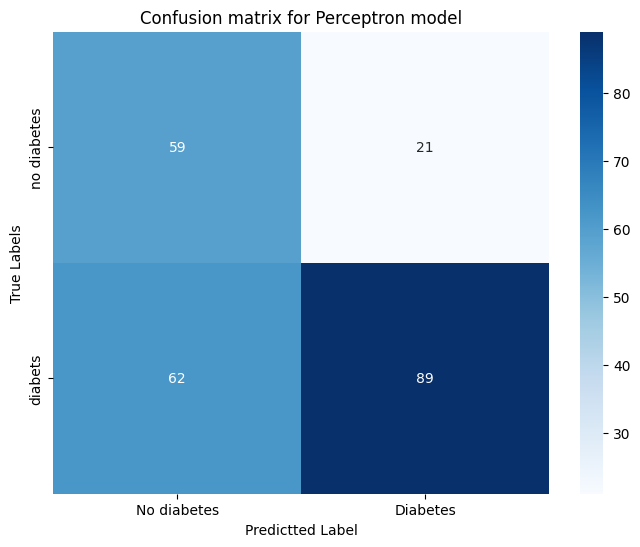

In [7]:
# generate confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# confustion matrix
cm = confusion_matrix(y_test, y_pred)
# plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues", xticklabels=["No diabetes", "Diabetes"], yticklabels=["no diabetes", "diabets"])
plt.xlabel("Predictted Label")
plt.ylabel("True Labels")
plt.title("Confusion matrix for Perceptron model")
plt.show()

In [8]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6406926406926406


In [10]:
# calculate precision
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
print(precision)

0.8090909090909091


In [11]:
# calculate recal
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
print(recall)

0.5894039735099338


In [12]:
#calculate f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.6819923371647509
